--- 1. Data Loading and Preprocessing ---
Data loaded successfully.
Total samples: 20640
Features (columns) used: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
----------------------------------------
Training set size (80%): 16512 samples
Testing set size (20%): 4128 samples
Data split complete.

--- 2. Model Training and Evaluation ---
Linear Regression model initialized.
Model training complete.

--- Model Performance Metrics ---
Mean Squared Error (MSE): 0.5559
R-squared (R² Score): 0.5758 (Closer to 1.0 is better)


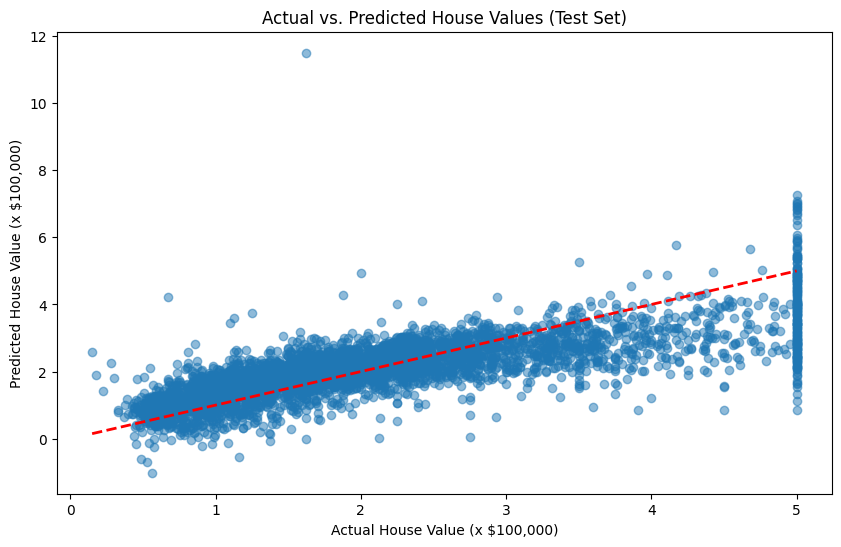


--- 3. Sample Prediction ---
Input features for prediction:
MedInc           8.0
HouseAge        20.0
AveRooms         6.0
AveBedrms        1.0
Population    1000.0
AveOccup         3.0
Latitude        34.0
Longitude     -118.0

Predicted Median House Value: $369,581.01


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- Slab 1 Project 2: Linear Regression Model ---

def load_and_preprocess_data():
    """Loads the California Housing dataset and prepares it for modeling."""
    print("--- 1. Data Loading and Preprocessing ---")
    
    # Load the data (equivalent to loading a clean CSV)
    housing = fetch_california_housing(as_frame=True)
    df = housing.frame
    
    # Separate features (X) and target (y)
    # The target variable is 'MedHouseVal' (Median House Value)
    X = df.drop(columns=['MedHouseVal'])
    y = df['MedHouseVal']
    
    print("Data loaded successfully.")
    print(f"Total samples: {len(df)}")
    print(f"Features (columns) used: {list(X.columns)}")
    print("----------------------------------------")
    
    # Splitting data into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    print(f"Training set size (80%): {len(X_train)} samples")
    print(f"Testing set size (20%): {len(X_test)} samples")
    print("Data split complete.")
    
    return X_train, X_test, y_train, y_test

def train_and_evaluate_model(X_train, X_test, y_train, y_test):
    """Trains the Linear Regression model and evaluates its performance."""
    print("\n--- 2. Model Training and Evaluation ---")
    
    # Initialize the Linear Regression Model
    model = LinearRegression()
    print("Linear Regression model initialized.")
    
    # Train the model using the training data
    model.fit(X_train, y_train)
    print("Model training complete.")
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("\n--- Model Performance Metrics ---")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R² Score): {r2:.4f} (Closer to 1.0 is better)")
    
    # Create a simple scatter plot of actual vs. predicted values for visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual House Value (x $100,000)")
    plt.ylabel("Predicted House Value (x $100,000)")
    plt.title("Actual vs. Predicted House Values (Test Set)")
    plt.show()
    
    return model

def make_sample_prediction(model):
    """Demonstrates a prediction on new, unseen data."""
    print("\n--- 3. Sample Prediction ---")
    
    # Example data for a new house (must have the same features as X_train)
    # Features in order: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude
    # Let's imagine a high-value area house: High income, newer, high avg rooms.
    sample_data = np.array([[8.0, 20.0, 6.0, 1.0, 1000.0, 3.0, 34.0, -118.0]]) 
    
    # The LinearRegression model expects a 2D array (even for one sample)
    sample_df = pd.DataFrame(sample_data, columns=[
        'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'
    ])
    
    predicted_value = model.predict(sample_df)[0]
    
    # Convert prediction back to actual dollars (since the target is in units of $100,000)
    predicted_price = predicted_value * 100000
    
    print(f"Input features for prediction:\n{sample_df.iloc[0].to_string()}")
    print(f"\nPredicted Median House Value: ${predicted_price:,.2f}")
    
    return predicted_price

if __name__ == '__main__':
    X_train, X_test, y_train, y_test = load_and_preprocess_data()
    
    if len(X_train) > 0:
        trained_model = train_and_evaluate_model(X_train, X_test, y_train, y_test)
        make_sample_prediction(trained_model)
